A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!ls -lh ../Data/us_dot/otp

total 186M
-rwxr-x--- 1 dsc dsc 22M mar 13  2018 On_Time_On_Time_Performance_2015_1.zip
-rwxr-x--- 1 dsc dsc 21M mar 13  2018 On_Time_On_Time_Performance_2015_2.zip
-rwxr-x--- 1 dsc dsc 24M mar 13  2018 On_Time_On_Time_Performance_2015_3.zip
-rwxr-x--- 1 dsc dsc 23M mar 13  2018 On_Time_On_Time_Performance_2015_4.zip
-rwxr-x--- 1 dsc dsc 24M mar 13  2018 On_Time_On_Time_Performance_2015_5.zip
-rwxr-x--- 1 dsc dsc 25M mar 13  2018 On_Time_On_Time_Performance_2015_6.zip
-rwxr-x--- 1 dsc dsc 25M mar 13  2018 On_Time_On_Time_Performance_2015_7.zip
-rwxr-x--- 1 dsc dsc 25M mar 13  2018 On_Time_On_Time_Performance_2015_8.zip
-rw-r--r-- 1 dsc dsc 132 oct 20 18:23 three_largest_file.txt
-rw-r--r-- 1 dsc dsc 487 oct 20 18:25 twenty_last_command.txt


For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

In [3]:
path = '../Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip'

In [4]:
!unzip -l {path}
# entre llaves le mandamos una variable python

Archive:  ../Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
230183662  2015-10-05 15:33   On_Time_On_Time_Performance_2015_8.csv
    12054  2015-10-05 15:33   readme.html
---------                     -------
230195716                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell

Remember, since the zip file contains several compressed files, we need to specify which one we want.

In [5]:
#!unzip {path} readme.html -d .

### Take a look at the beginning of the readme file

using the shell

In [6]:
!head readme.html

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	On-Time Performance data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [7]:
from IPython.display import IFrame
IFrame('readme.html', 800, 600)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [8]:
!unzip -p {path} | head -n 2

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

In [9]:
from zipfile import ZipFile

zf = ZipFile(path)
zf

<zipfile.ZipFile filename='../Data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip' mode='r'>

In [10]:
zf.filelist

[<ZipInfo filename='On_Time_On_Time_Performance_2015_8.csv' compress_type=deflate filemode='-rw-r--r--' file_size=230183662 compress_size=25723470>,
 <ZipInfo filename='readme.html' compress_type=deflate filemode='-rw-r--r--' file_size=12054 compress_size=2208>]

In [11]:
filename = path.split('/')[-1].replace('zip', 'csv')
csvfile = zf.open(filename)
csvfile

<zipfile.ZipExtFile name='On_Time_On_Time_Performance_2015_8.csv' mode='r' compress_type=deflate>

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [12]:
csvfile.readline()

b'"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div

In [13]:
csvfile.readline()

b'2015,3,8,2,7,2015-08-02,"AA",19805,"AA","N790AA","1",12478,1247803,31703,"JFK","New York, NY","NY","36","New York",22,12892,1289203,32575,"LAX","Los Angeles, CA","CA","06","California",91,"0900","0854",-6.00,0.00,0.00,-1,"0900-0959",25.00,"0919","1132",15.00,"1213","1147",-26.00,0.00,0.00,-2,"1200-1259",0.00,"",0.00,373.00,353.00,313.00,1.00,2475.00,10,,,,,,"",,,0,,,,,"",,,"",,,"","","",,,"",,,"","","",,,"",,,"","","",,,"",,,"","","",,,"",,,"","",\n'

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [14]:
%%time

zf = ZipFile(path)
csvfile = zf.open(filename)
df = pd.read_csv(csvfile)
# Gastas el csvfile por que se abre por una conezion de open

<string>:2: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 15.7 s, sys: 2.67 s, total: 18.4 s
Wall time: 18.8 s


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [15]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,3,8,2,7,2015-08-02,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,3,1,2015-08-03,AA,19805,AA,N784AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,4,2,2015-08-04,AA,19805,AA,N793AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,5,3,2015-08-05,AA,19805,AA,N787AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,6,4,2015-08-06,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.shape

(510536, 110)

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [17]:
pd.options.display.max_columns = None

In [18]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,3,8,2,7,2015-08-02,AA,19805,AA,N790AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,854.0,-6.0,0.0,0.0,-1.0,0900-0959,25.0,919.0,1132.0,15.0,1213,1147.0,-26.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,373.0,353.0,313.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,3,1,2015-08-03,AA,19805,AA,N784AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,858.0,-2.0,0.0,0.0,-1.0,0900-0959,33.0,931.0,1147.0,31.0,1213,1218.0,5.0,5.0,0.0,0.0,1200-1259,0.0,NaN,0.0,373.0,380.0,316.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,4,2,2015-08-04,AA,19805,AA,N793AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,902.0,2.0,2.0,0.0,0.0,0900-0959,43.0,945.0,1211.0,8.0,1213,1219.0,6.0,6.0,0.0,0.0,1200-1259,0.0,NaN,0.0,373.0,377.0,326.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,5,3,2015-08-05,AA,19805,AA,N787AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,39.0,936.0,1207.0,28.0,1213,1235.0,22.0,22.0,1.0,1.0,1200-1259,0.0,NaN,0.0,373.0,398.0,331.0,1.0,2475.0,10,0.0,0.0,22.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,6,4,2015-08-06,AA,19805,AA,N790AA,1,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,46.0,943.0,1209.0,14.0,1213,1223.0,10.0,10.0,0.0,0.0,1200-1259,0.0,NaN,0.0,373.0,386.0,326.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [19]:
# Count not null values
df.count()

Year                  510536
Quarter               510536
Month                 510536
DayofMonth            510536
DayOfWeek             510536
FlightDate            510536
UniqueCarrier         510536
AirlineID             510536
Carrier               510536
TailNum               509727
FlightNum             510536
OriginAirportID       510536
OriginAirportSeqID    510536
OriginCityMarketID    510536
Origin                510536
OriginCityName        510536
OriginState           510536
OriginStateFips       510536
OriginStateName       510536
OriginWac             510536
DestAirportID         510536
DestAirportSeqID      510536
DestCityMarketID      510536
Dest                  510536
DestCityName          510536
DestState             510536
DestStateFips         510536
DestStateName         510536
DestWac               510536
CRSDepTime            510536
                       ...  
Div2WheelsOn              10
Div2TotalGTime            10
Div2LongestGTime          10
Div2WheelsOff 

In [20]:
non_null_cols = df.columns[df.count() > 1000]
non_null_cols

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum', 'FlightNum',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay',

In [21]:
df2 = df[non_null_cols]
print(df.shape, '\n')
print(df2.shape)

(510536, 110) 

(510536, 77)


Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [22]:
start_with_origin = list(df2.columns[df2.columns.str.lower().str.contains('origin')])

In [23]:
start_with_origin

['OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac']

In [24]:
df2[start_with_origin].sample(3)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
280981,11003,1100303,31003,CID,"Cedar Rapids/Iowa City, IA",IA,19,Iowa,61
88622,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91
497145,13930,1393003,30977,ORD,"Chicago, IL",IL,17,Illinois,41


So much redundant information!

In [25]:
# Another way to do that

In [26]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Unnamed: 109'],
      dtype='object', length=110)

In [27]:
df2.columns.str.contains('Origin')

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [28]:
origin_colnames = df2.columns[df2.columns.str.contains('Origin')]
origin_colnames

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [29]:
df2[origin_colnames].sample(10)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
438023,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34
17357,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91
480265,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34
318835,13930,1393003,30977,ORD,"Chicago, IL",IL,17,Illinois,41
173975,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91
226948,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73
28878,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33
129781,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74
138041,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22
139986,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91


## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

In [30]:
columns_to_keep = ['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
                   'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
                   'DepTime', 'DepDelay', 'AirTime', 'Distance']

In [31]:
simple = df2[columns_to_keep]

In [32]:
simple.shape

(510536, 15)

## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [33]:
simple.sample(3)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance
260463,2015-08-11,2,HA,N487HA,367,KOA,"Kona, HI",Hawaii,HNL,"Honolulu, HI",Hawaii,936.0,-4.0,39.0,163.0
150030,2015-08-02,7,WN,N925WN,867,GSP,"Greer, SC",South Carolina,MDW,"Chicago, IL",Illinois,637.0,-3.0,88.0,562.0
365500,2015-08-20,4,UA,N67812,1942,LAX,"Los Angeles, CA",California,IAH,"Houston, TX",Texas,2354.0,-2.0,162.0,1379.0


Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First step:

#### Exercise

Define a function that will parse our int hours into a reasonable format ("HH:MM"). It should take only one int hour and return the appropriate representation.

In [34]:
# Assertions serve to check that a given condition is True:

assert(False), 'assertion wasn\'t true'

AssertionError: assertion wasn't true

In [35]:
def parse_times(float_time):
    if pd.isnull(float_time):
        return np.nan
    
    string_time = str(float_time).zfill(6)
    
    return string_time[:2] + ':' + string_time[2:4]

assert(parse_times(1935.0) == '19:35'), '19:35 not right'
assert(parse_times(557.0) == '05:57'), '05:57 not right'
assert(parse_times(2345.0) == '23:45'), '23:45 not right'
assert(pd.isnull(parse_times(np.nan))), 'np.nan not right'

In [36]:
pd.isnull('hi')

False

In [37]:
str(1935.0)[:2] + ':' + str(1935.0)[2:4]

'19:35'

In [38]:
str(935.0)[:2] + ':' + str(935.0)[2:4]

'93:5.'

In [39]:
strtime = str(935.0)
strtime.zfill(6)

'0935.0'

In [40]:
def parse_time(float_time):
    if np.isnan(float_time):
        return float_time
    fs = str(float_time)
    fs = fs.split('.')[0].zfill(4)
    hhmm = fs[:2] + ':' + fs[2:4]
    return hhmm

assert(parse_time(1935.0) == '19:35'), '19:35 not right'
assert(parse_time(935.0) == '09:35'), '09:35 not right'
assert(pd.isnull(parse_time(np.nan))), 'np.nan not right'

In [41]:
def parse_time(float_time):
    if np.isnan(float_time):
        return float_time
    hour = float_time // 100
    minutes = float_time % 100
    return '%.2d:%.2d' % (hour, minutes)

assert(parse_time(1935.0) == '19:35'), '19:35 not right'
assert(parse_time(935.0) == '09:35'), '09:35 not right'
assert(np.isnan(parse_time(np.nan))), 'np.nan not right'

Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime's documentatoin](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for info on the acceptable format.

In [42]:
simple['FlightDate'].sample(10)

247031    2015-08-20
55235     2015-08-13
282042    2015-08-28
171118    2015-08-24
308575    2015-08-21
183504    2015-08-12
479839    2015-08-21
398670    2015-08-11
205577    2015-08-19
212251    2015-08-19
Name: FlightDate, dtype: object

#### Exercise

Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable.

In [43]:
string_datetimes = simple['FlightDate'] + ' ' + simple['DepTime'].apply(parse_time)
string_datetimes.sample(3)

175642    2015-08-09 10:10
62097     2015-08-19 09:50
258838    2015-08-08 07:40
dtype: object

#### Exercise

Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [44]:
datetimes = pd.to_datetime(string_datetimes, errors='coerce')

In [45]:
# Datetime columns are useful becase they have a dt attribute with
# properties specific to dates
datetimes.dt.dayofweek.head(5)

0    6.0
1    0.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [46]:
simple['DepDateTime'] = datetimes

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Inspect the types, see if everything is in order

In [47]:
simple.dtypes

FlightDate                 object
DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepTime                   float64
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays. 

How would you find the 5 maximum delays?

In [48]:
max_delay = simple.sort_values(by='DepDelay', ascending=False).head(5)

In [49]:
max_delay

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
4106,2015-08-01,6,AA,N479AA,96,RIC,"Richmond, VA",Virginia,DFW,"Dallas/Fort Worth, TX",Texas,1427.0,1878.0,156.0,1158.0,2015-08-01 14:27:00
7165,2015-08-23,7,AA,N5ERAA,270,HNL,"Honolulu, HI",Hawaii,LAX,"Los Angeles, CA",California,825.0,1515.0,299.0,2556.0,2015-08-23 08:25:00
19225,2015-08-01,6,AA,N503AA,1291,MKE,"Milwaukee, WI",Wisconsin,DFW,"Dallas/Fort Worth, TX",Texas,627.0,1402.0,108.0,853.0,2015-08-01 06:27:00
33642,2015-08-10,1,AA,N469AA,2263,CMH,"Columbus, OH",Ohio,DFW,"Dallas/Fort Worth, TX",Texas,824.0,1259.0,125.0,926.0,2015-08-10 08:24:00
7028,2015-08-10,1,AA,N5DHAA,266,LIH,"Lihue, HI",Hawaii,LAX,"Los Angeles, CA",California,1033.0,1235.0,292.0,2615.0,2015-08-10 10:33:00


In [50]:
simple['DepDelay'].describe()

count    505817.000000
mean          9.932045
std          36.920822
min         -42.000000
25%          -5.000000
50%          -1.000000
75%           8.000000
max        1878.000000
Name: DepDelay, dtype: float64

In [51]:
simple_c = simple.copy()

In [52]:
simple_c.loc[simple_c['DepDelay'] < 0, 'DepDelay'] = 0
# Other ways to do that
# simple_c.apply(lambda delay: 0 if delay < 0 else delay).head()
# simple_c.apply(lambda delay: max(0, delay)).head()

In [53]:
simple_c['DepDelay'].mean()

12.57374702708687

In [54]:
simple.groupby('Carrier')['DepDelay'].mean()

Carrier
AA     9.357355
AS     3.668762
B6    14.604436
DL     7.746436
EV     7.785358
F9     8.849347
HA     4.819096
MQ     8.275043
NK    22.256118
OO     7.747202
UA    14.306113
VX     8.900653
WN    11.738553
Name: DepDelay, dtype: float64

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [55]:
simple.corr()

,DayOfWeek,FlightNum,DepTime,DepDelay,AirTime,Distance
DayOfWeek,1.000000,0.018226,0.006873,-0.014803,0.011359,0.016482
FlightNum,0.018226,1.000000,-0.006042,-0.024343,-0.313282,-0.321260
DepTime,0.006873,-0.006042,1.000000,0.195886,-0.019440,-0.015587
DepDelay,-0.014803,-0.024343,0.195886,1.000000,0.024412,0.025826
AirTime,0.011359,-0.313282,-0.019440,0.024412,1.000000,0.991452
Distance,0.016482,-0.321260,-0.015587,0.025826,0.991452,1.000000


#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [56]:
avg_delays = simple.groupby('TailNum')['DepDelay'].mean()
top_ten = avg_delays.sort_values(ascending=False).head(10)
top_ten

TailNum
N37018    293.000000
N218UA    270.000000
N283AY    208.000000
N795UA    193.000000
N7AEAA    191.666667
N182DN    187.500000
N793UA    136.750000
N7AHAA    115.250000
N7BPAA     98.500000
N7BXAA     92.800000
Name: DepDelay, dtype: float64

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [57]:
avg_delays = simple.groupby('TailNum')['DepDelay'].agg(['mean', 'count'])
top_ten = avg_delays.sort_values(by='mean', ascending=False).head(10)
top_ten

,mean,count
TailNum,,
N37018,293.000000,2
N218UA,270.000000,1
N283AY,208.000000,2
N795UA,193.000000,1
N7AEAA,191.666667,3
N182DN,187.500000,2
N793UA,136.750000,4
N7AHAA,115.250000,4
N7BPAA,98.500000,2


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [58]:
consistently_late = avg_delays[avg_delays['count'] >= 15].sort_values(by='mean', ascending=False).head(10)
consistently_late

,mean,count
TailNum,,
N357AA,90.047619,21
N13110,74.187500,16
N448SW,71.473684,19
N780UA,62.368421,19
N374SW,61.173913,23
N76064,59.000000,15
N8ACAA,56.187500,16
N5ELAA,50.076923,78
N73275,49.949153,59


In [59]:
simple[simple['TailNum'].isin(consistently_late.index)]

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
112,2015-08-20,4,AA,N357AA,5,DFW,"Dallas/Fort Worth, TX",Texas,HNL,"Honolulu, HI",Hawaii,1156.0,76.0,464.0,3784.0,2015-08-20 11:56:00
113,2015-08-21,5,AA,N357AA,5,DFW,"Dallas/Fort Worth, TX",Texas,HNL,"Honolulu, HI",Hawaii,1037.0,-3.0,465.0,3784.0,2015-08-21 10:37:00
177,2015-08-23,7,AA,N357AA,6,OGG,"Kahului, HI",Hawaii,DFW,"Dallas/Fort Worth, TX",Texas,1712.0,-3.0,411.0,3711.0,2015-08-23 17:12:00
222,2015-08-18,2,AA,N357AA,8,HNL,"Honolulu, HI",Hawaii,DFW,"Dallas/Fort Worth, TX",Texas,1737.0,-3.0,445.0,3784.0,2015-08-18 17:37:00
224,2015-08-20,4,AA,N357AA,8,HNL,"Honolulu, HI",Hawaii,DFW,"Dallas/Fort Worth, TX",Texas,1733.0,-7.0,425.0,3784.0,2015-08-20 17:33:00
225,2015-08-21,5,AA,N357AA,8,HNL,"Honolulu, HI",Hawaii,DFW,"Dallas/Fort Worth, TX",Texas,1733.0,-7.0,415.0,3784.0,2015-08-21 17:33:00
825,2015-08-18,2,AA,N5ELAA,29,MIA,"Miami, FL",Florida,BOS,"Boston, MA",Massachusetts,1225.0,10.0,220.0,1258.0,2015-08-18 12:25:00
1014,2015-08-16,7,AA,N357AA,102,HNL,"Honolulu, HI",Hawaii,DFW,"Dallas/Fort Worth, TX",Texas,2040.0,-3.0,432.0,3784.0,2015-08-16 20:40:00
1020,2015-08-22,6,AA,N357AA,102,HNL,"Honolulu, HI",Hawaii,DFW,"Dallas/Fort Worth, TX",Texas,2033.0,-10.0,421.0,3784.0,2015-08-22 20:33:00
1415,2015-08-23,7,AA,N357AA,119,DFW,"Dallas/Fort Worth, TX",Texas,OGG,"Kahului, HI",Hawaii,1059.0,9.0,456.0,3711.0,2015-08-23 10:59:00


In [60]:
simple[simple['TailNum'].isin(consistently_late.index)][['Carrier', 'TailNum']].drop_duplicates()

,Carrier,TailNum
112,AA,N357AA
825,AA,N5ELAA
19989,AA,N8ACAA
128053,UA,N780UA
129641,UA,N13110
133907,UA,N73275
134103,UA,N76064
144536,WN,N374SW
282431,NK,N504NK
292836,OO,N448SW


#### Exercise: 

Show cities by descending number of airports

In [61]:
simple.groupby('OriginCityName')['Origin'].nunique().sort_values(ascending=False).head(10)

OriginCityName
Houston, TX            2
Chicago, IL            2
New York, NY           2
Washington, DC         2
Fayetteville, AR       1
Fayetteville, NC       1
Flagstaff, AZ          1
Flint, MI              1
Fort Lauderdale, FL    1
Fort Myers, FL         1
Name: Origin, dtype: int64

In [62]:
# Another way to do that
# simple.drop_duplicates(['Origin', 'OriginCityName'])['OriginCityName'].value_counts()

In [63]:
df.groupby('OriginCityMarketID')['Origin'].agg(['unique', 'nunique']).sort_values(by='nunique', ascending=False).head(10)

,unique,nunique
OriginCityMarketID,,
31703,"[JFK, LGA, EWR, HPN, SWF, ISP]",6
32575,"[LAX, SNA, ONT, BUR, LGB]",5
30852,"[DCA, IAD, BWI]",3
30721,"[BOS, PVD, MHT]",3
32457,"[SFO, SJC, OAK]",3
31453,"[IAH, HOU]",2
30194,"[DFW, DAL]",2
30647,"[CLE, CAK]",2
32467,"[MIA, FLL]",2


## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot with matplotlib. Check the documentation

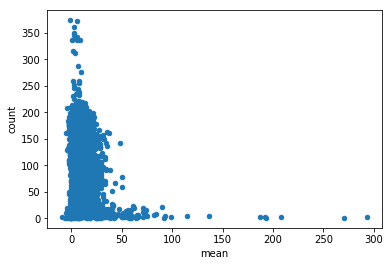

In [65]:
avg_delays.plot('mean','count', kind='scatter')

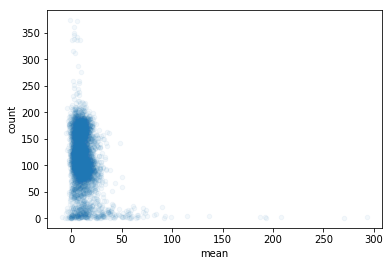

In [66]:
avg_delays.plot('mean','count', kind='scatter', alpha=.05)

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

(-50, 250)

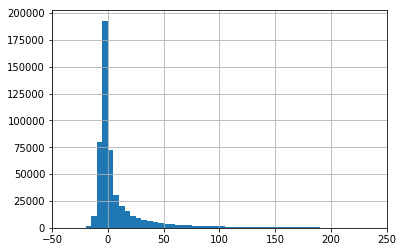

In [67]:
df['DepDelay'].hist(bins=range(-50, 1000, 5))
plt.xlim((-50, 250))

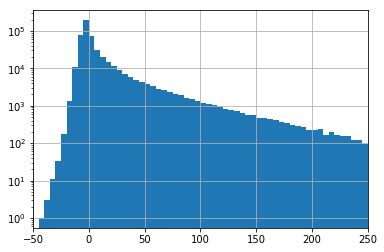

In [68]:
df['DepDelay'].hist(bins=range(-50, 1000, 5))
plt.xlim((-50, 250))
plt.yscale('log')

[]

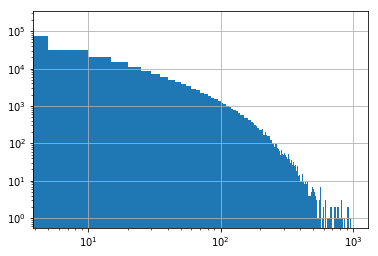

In [69]:
df['DepDelay'].hist(bins=range(-50, 1000, 5))
plt.loglog()

### Another question:

how do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

In [70]:
plt.boxplot

<function matplotlib.pyplot.boxplot>

In [71]:
groups = simple.groupby(simple['DepDateTime'].dt.hour)['DepDelay']

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

In [72]:
hours = []
delays = []

for label, group in groups:
    hours.append(label)
    delays.append(group)

### Everything looks ok! let's plot this thing!

/home/dsc/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


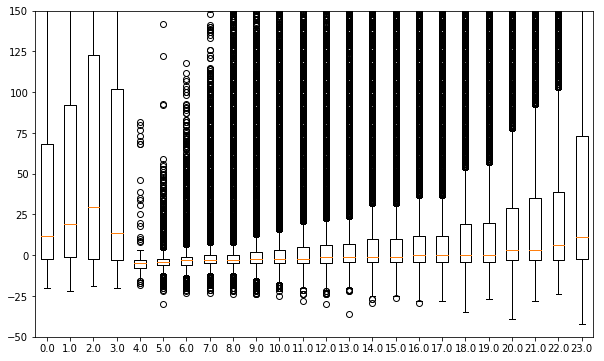

In [73]:
f = plt.figure(figsize=(10,6))
plt.boxplot(delays, labels=hours)

plt.ylim((-50, 150));